# Importing library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Loading Dataset

In [7]:
train = pd.read_csv(r'C:\Users\CHIDI NGWOKE\Documents\south-african-language-identifer-hackaton\train_set.csv')
test = pd.read_csv(r'C:\Users\CHIDI NGWOKE\Documents\south-african-language-identifer-hackaton\test_set.csv')

# Exploring our dataset (EDA)¶
lets take a look at the features and contents of our dataset

In [8]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [9]:
train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [10]:
train["lang_id"].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

In [11]:
# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)

In [12]:
# separating the independent and dependant features
X = train["text"]
y = train["lang_id"]


In [13]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [14]:
x_train

10264                                                                                    empeleni kube ukuphambana kwezinkomishi kwemvelo ukwamukelwa ngokungakhombisi muzwa nangaphandle kombhikisho kwesiteshi sabo ngaphandle kokudaza inkani ngaphandle komzabalazo futhi nembala ngaphandle kwempi
31236    iincwadi zokuzazisa ezikhujthwe ngokuya komthetho wokwaziwa ka- namkha nayikuthi abanazo iincwadi zokuzazisa incwadi yesifungo esizaliswe eforomini bi- amaphandle atjhada amasewula afrika alindelwe bona alethe iimpaspoti zawo ezisebenzako kanye neforomo bi- isifungo somnqopho womtjhado
6258                                               n afskrif van die vertoë moet by die munisipaliteit ingedien word en moet deur die persoon wat n belang by die toestaan of weiering van die aansoek het beteken word aan die aansoeker of sy of haar verteenwoordiger en die aangewese drank-beampte
27373         ezokuthengiselana izimali izindaba zomthetho nezomnotho noma v ulwazi olukhethekile olungasiza ink

In [15]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier

# # Assuming you have the training data x_train and corresponding labels y_train
# # Create the pipeline
# rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

# # Train the pipeline
# rf.fit(x_train, y_train)


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have the training data x_train and corresponding labels y_train
# Create the pipeline
lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Train the pipeline
lr.fit(x_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [16]:
pred_lr = lr.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_lr))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_lr))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       549
         eng       1.00      1.00      1.00       626
         nbl       1.00      0.98      0.99       613
         nso       1.00      1.00      1.00       578
         sot       1.00      1.00      1.00       579
         ssw       0.99      1.00      1.00       597
         tsn       1.00      1.00      1.00       572
         tso       1.00      1.00      1.00       622
         ven       1.00      1.00      1.00       625
         xho       0.99      1.00      1.00       615
         zul       0.98      0.99      0.98       624

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

The accuracy score of the SVC is: 0.9963636363636363


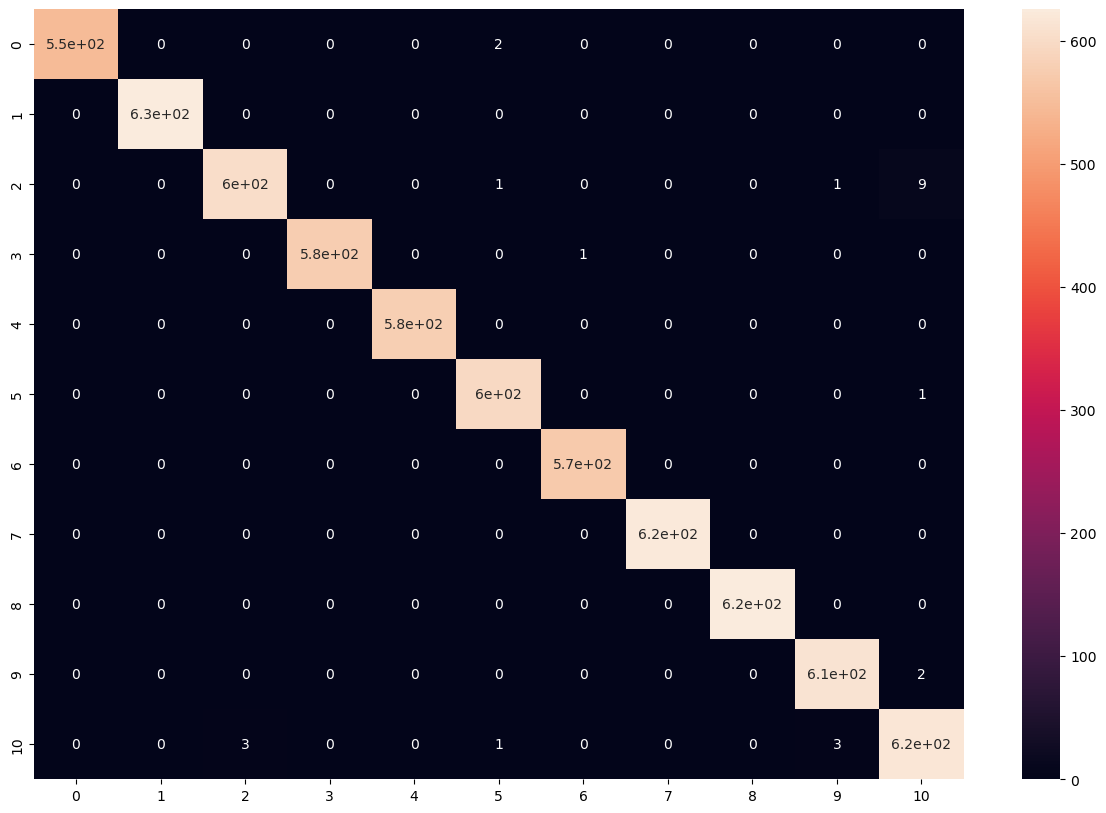

In [19]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, pred_lr)
cm = confusion_matrix(y_test, pred_lr)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# prediction = stacking_NB2.predict(X_test)
prediction = lr.predict(x_test)


In [21]:
X = test['text']
# Vectorize = vect.transform(X)

# vectorized_data = vectorizer.fit_transform(X)

In [22]:
print(type(prediction))

<class 'numpy.ndarray'>


In [23]:
test['lang_id'] = lr.predict(X)

In [25]:
submission = test[['index', 'lang_id']]
submission.to_csv('language_identification_hackaton.csv',index=False)
submission

,index,lang_id
0,1,ssw
1,2,nbl
2,3,ven
3,4,ssw
4,5,ssw
...,...,...
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot
